In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset (make sure titanic.csv is in the same folder as this notebook)
df = pd.read_csv('titanic.csv.csv')

# Quick peek at the data
print("First 5 rows of the dataset:")
print(df.head())

# Select relevant columns and drop missing values
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Survived']].dropna()

# Convert categorical data to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_preds)
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")

# Train Logistic Regression classifier
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")





First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

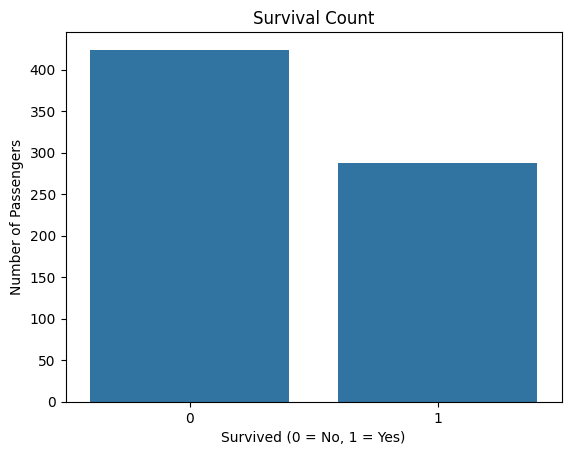

In [8]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()


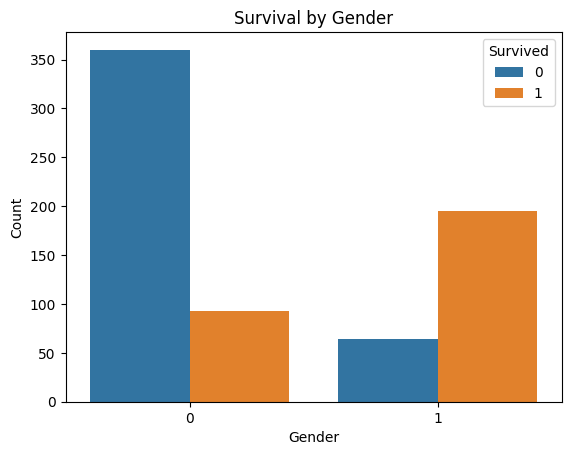

In [9]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


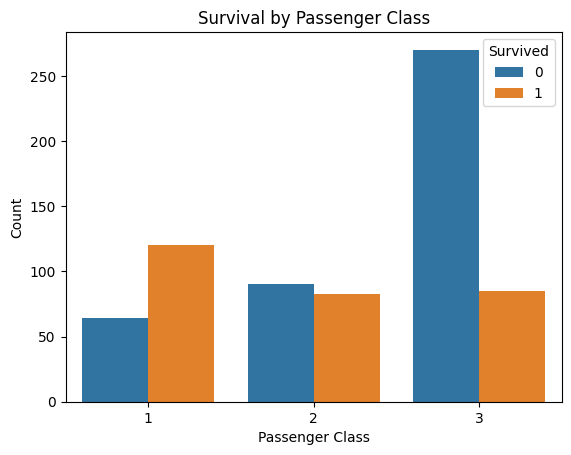

In [10]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


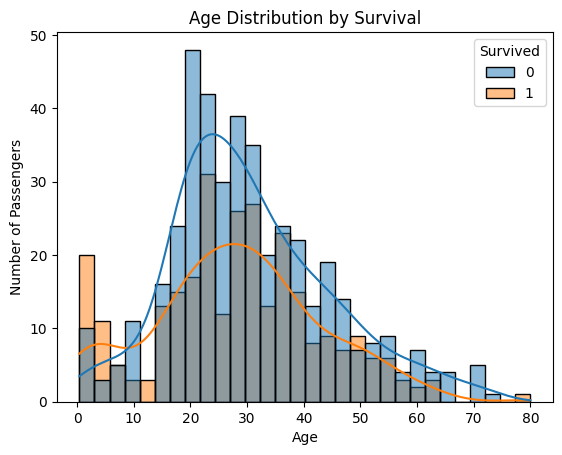

In [11]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()
